TASK 1:

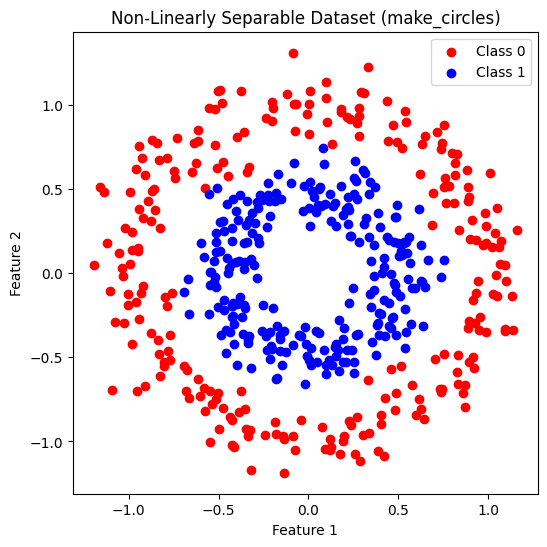

<Figure size 640x480 with 0 Axes>

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap

# Generate the non-linearly separable dataset
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Visualize the data points
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Non-Linearly Separable Dataset (make_circles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.show()

plt.savefig('svm_nonlinear_dataset.png', dpi=300)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of C values (regularization parameter)


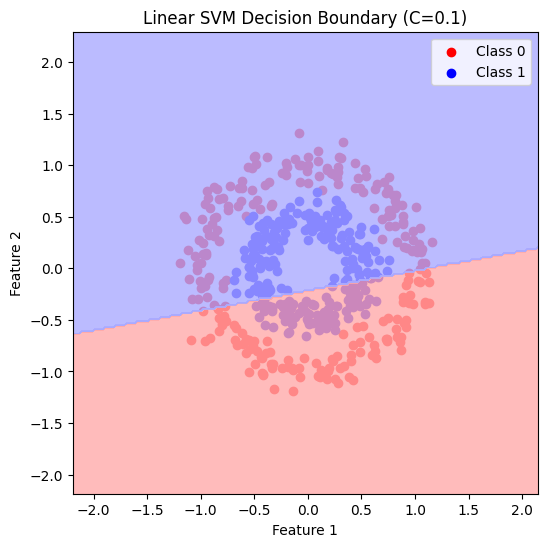

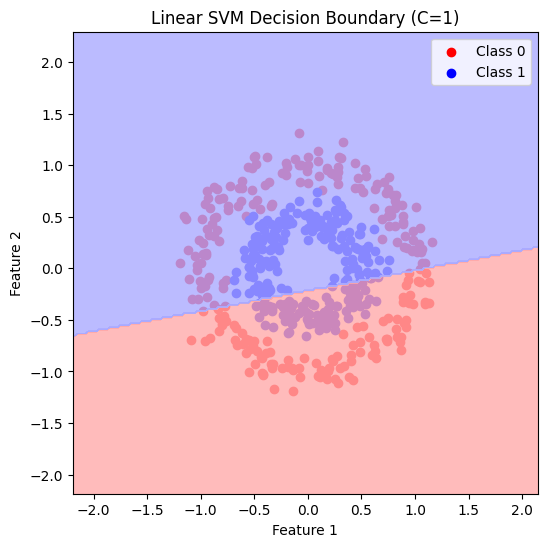

,Kernel,C,Accuracy,Precision,Recall,F1-Score
0,linear,0.1,0.52,0.52,0.52,0.52
1,linear,1.0,0.52,0.52,0.52,0.52


In [98]:
# Initialize a list to store the results for linear SVM with different C values
linear_svm_results = []
c_values = [0.1, 1]
# Function to extract average precision, recall, and F1-score from the classification report
def extract_classification_report_metrics(report):
    lines = report.split('\n')
    for line in lines:
        if 'weighted avg' in line:
            parts = line.split()
            return {
                'precision': float(parts[-4]),
                'recall': float(parts[-3]),
                'f1-score': float(parts[-2])
            }

# Iterate through different C values and train linear SVM models
for c in c_values:
    # Train the SVM classifier with a linear kernel
    svm = SVC(kernel='linear', C=c, random_state=42)
    svm.fit(X_train, y_train)

    # Plot decision boundaries
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

    # Plot decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    plt.title(f'Linear SVM Decision Boundary (C={c})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

    # Evaluate model performance
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report_metrics = extract_classification_report_metrics(classification_report(y_test, y_pred))

    # Store the results
    linear_svm_results.append({
        'Kernel': 'linear',
        'C': c,
        'Accuracy': accuracy,
        'Precision': report_metrics['precision'],
        'Recall': report_metrics['recall'],
        'F1-Score': report_metrics['f1-score']
    })

# Convert the results list to a DataFrame
linear_svm_results_df = pd.DataFrame(linear_svm_results)
linear_svm_results_df


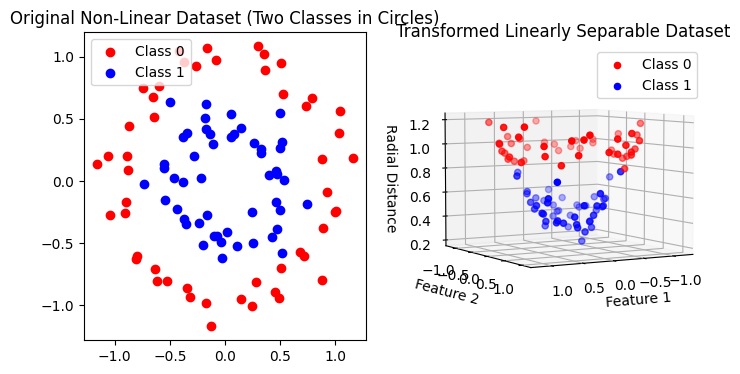

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

# Generate the non-linearly separable dataset
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# Add a radial distance feature
X_transformed = np.hstack([X, np.linalg.norm(X, axis=1).reshape(-1, 1)])

# Plot the original non-linear dataset
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Original Non-Linear Dataset (Two Classes in Circles)')
plt.legend()

# Plot the transformed linearly separable dataset in 3D
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(X_transformed[y == 0][:, 0], X_transformed[y == 0][:, 1], X_transformed[y == 0][:, 2], color='red', label='Class 0')
ax.scatter(X_transformed[y == 1][:, 0], X_transformed[y == 1][:, 1], X_transformed[y == 1][:, 2], color='blue', label='Class 1')
ax.set_title('Transformed Linearly Separable Dataset')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Radial Distance')
ax.legend()

# Set the viewing angle (elevation, azimuth)
elevation = 5  # vertical rotation
azimuth = 60     # horizontal rotation
ax.view_init(elevation, azimuth)  # Set the viewing angle

plt.show()


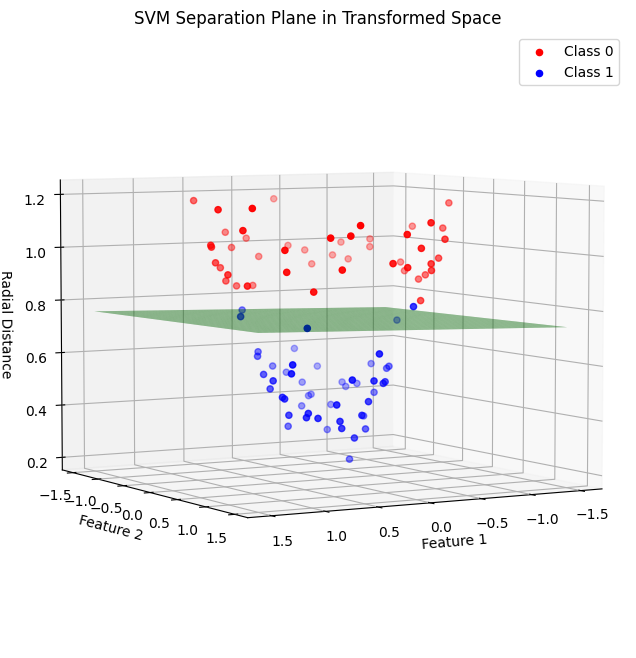

In [100]:
from sklearn.svm import SVC

# Train the SVM classifier with a linear kernel
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_transformed, y)

# Extract the coefficients and intercept of the trained SVM model
coefficients = svm.coef_[0]
intercept = svm.intercept_[0]

# Creating a meshgrid for the separation plane
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))

# Calculate the corresponding z values for the separation plane
# Plane equation: ax + by + cz + d = 0 => z = -(ax + by + d)/c
zz = (-coefficients[0]*xx - coefficients[1]*yy - intercept) / coefficients[2]

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the transformed data
ax.scatter(X_transformed[y == 0][:, 0], X_transformed[y == 0][:, 1], X_transformed[y == 0][:, 2], color='red', label='Class 0')
ax.scatter(X_transformed[y == 1][:, 0], X_transformed[y == 1][:, 1], X_transformed[y == 1][:, 2], color='blue', label='Class 1')

# Plot the separation plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='green')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Radial Distance')
ax.set_title('SVM Separation Plane in Transformed Space')
ax.legend()


# Set the viewing angle (elevation, azimuth)
elevation = 5  # vertical rotation
azimuth = 60     # horizontal rotation

# Set the viewing angle
ax.view_init(elevation, azimuth)

plt.show()


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [102]:
from sklearn.metrics import accuracy_score

# Initialize a list to store the results for linear SVM
linear_results = []
c_values = [0.1,1]
# Reiterate through the C values, train linear SVM models, and store performance
for c in c_values:
    # Train the SVM classifier with a linear kernel
    svm_linear = SVC(kernel='linear', C=c, random_state=42)
    svm_linear.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_linear = svm_linear.predict(X_test)
    accuracy_linear = accuracy_score(y_test, y_pred_linear)
    report_metrics_linear = extract_classification_report_metrics(classification_report(y_test, y_pred_linear))

    # Store the results
    linear_results.append({
        'Kernel': 'linear',
        'C': c,
        'Accuracy': accuracy_linear,
        'Precision': report_metrics_linear['precision'],
        'Recall': report_metrics_linear['recall'],
        'F1-Score': report_metrics_linear['f1-score']
    })

# Convert the results list to a DataFrame
linear_results_df = pd.DataFrame(linear_results)
linear_results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Kernel,C,Accuracy,Precision,Recall,F1-Score
0,linear,0.1,0.333333,0.11,0.33,0.17
1,linear,1.0,1.000000,1.00,1.00,1.00


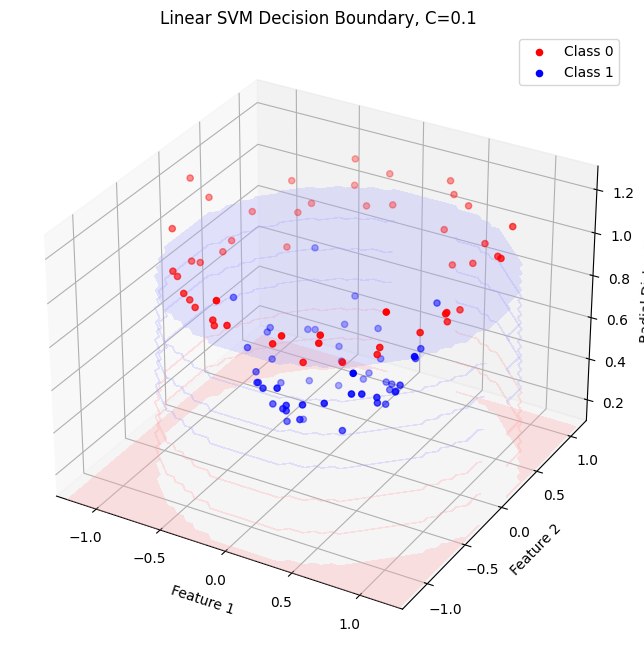

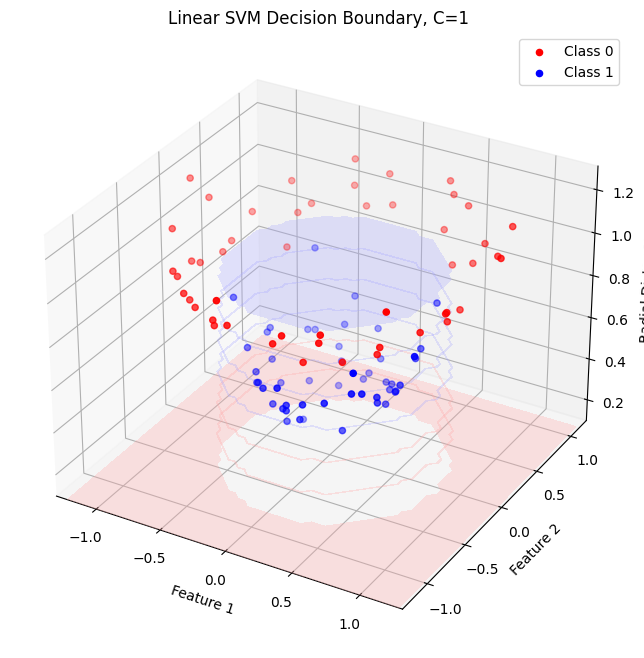

Non-linear techniques

In [104]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Splitting the original (non-transformed) dataset into training and test sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of C values and kernel types
c_values = [0.1, 1, 10]
kernel_types = ['rbf', 'poly']


In [105]:
import pandas as pd

# Initialize a list to store the results
results = []

# Function to extract average precision, recall, and F1-score from the classification report
def extract_classification_report_metrics(report):
    lines = report.split('\n')
    for line in lines:
        if 'weighted avg' in line:
            parts = line.split()
            return {
                'precision': float(parts[-4]),
                'recall': float(parts[-3]),
                'f1-score': float(parts[-2])
            }

# Reiterate through the kernels and C values, train SVM models, and store performance
for kernel in kernel_types:
    for c in c_values:
        # Train the SVM classifier
        svm = SVC(kernel=kernel, C=c, random_state=42)
        svm.fit(X_train_original, y_train_original)

        # Predict and evaluate
        y_pred = svm.predict(X_test_original)
        accuracy = accuracy_score(y_test_original, y_pred)
        report_metrics = extract_classification_report_metrics(classification_report(y_test_original, y_pred))

        # Store the results
        results.append({
            'Kernel': kernel,
            'C': c,
            'Accuracy': accuracy,
            'Precision': report_metrics['precision'],
            'Recall': report_metrics['recall'],
            'F1-Score': report_metrics['f1-score']
        })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)
results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

,Kernel,C,Accuracy,Precision,Recall,F1-Score
0,rbf,0.1,0.333333,0.11,0.33,0.17
1,rbf,1.0,0.933333,0.94,0.93,0.93
2,rbf,10.0,0.933333,0.94,0.93,0.93
3,poly,0.1,0.333333,0.11,0.33,0.17
4,poly,1.0,0.466667,0.79,0.47,0.41
5,poly,10.0,0.533333,0.81,0.53,0.50


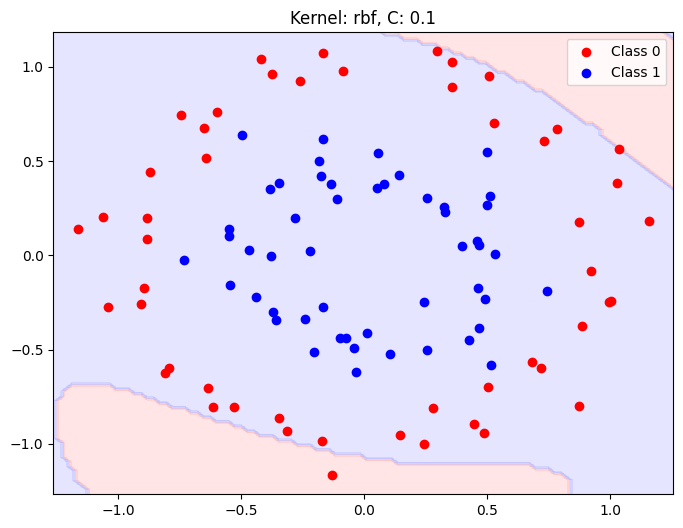

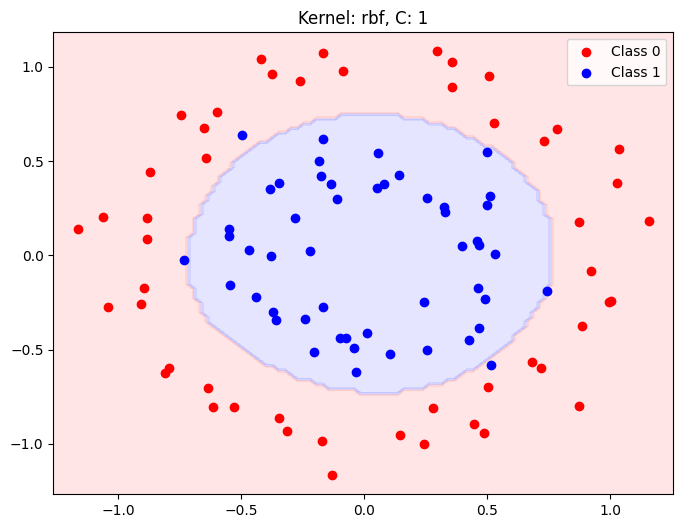

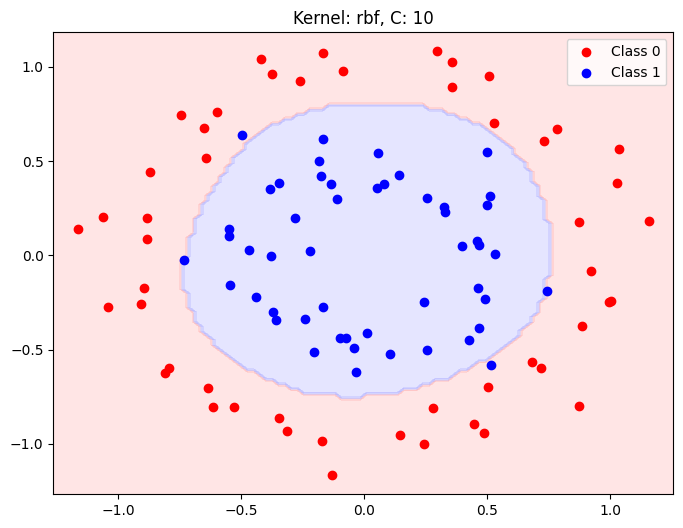

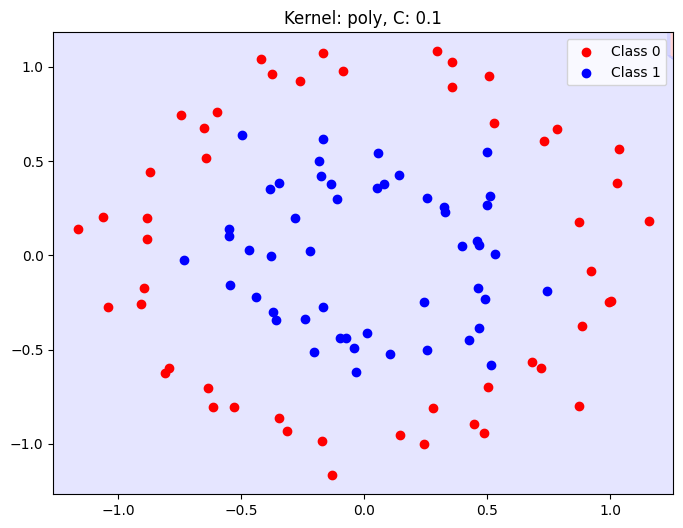

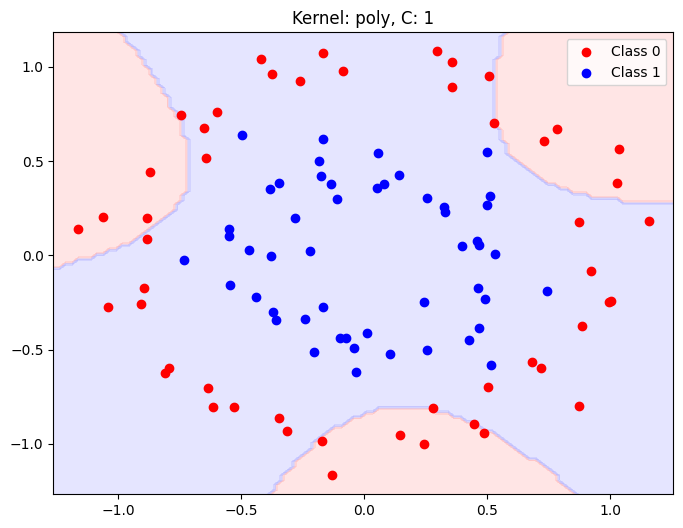

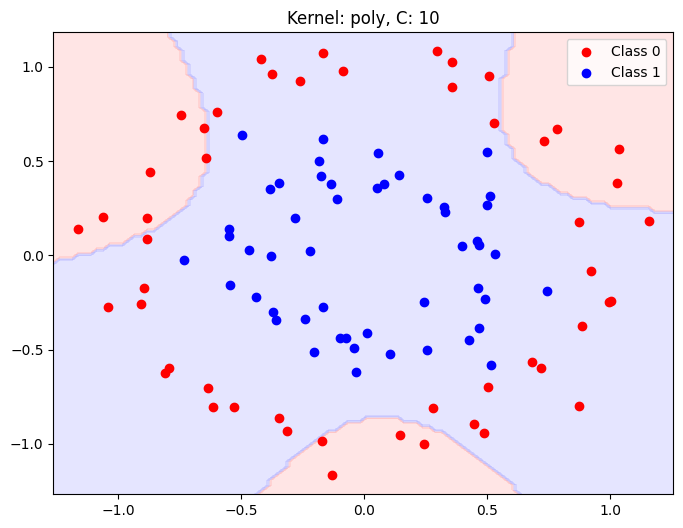

In [106]:
def plot_decision_boundary(clf, X, y, title):
    # Define the axis limits
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.legend()

# Iterate through the kernel types and C values to plot decision boundaries
for kernel in kernel_types:
    for c in c_values:
        svm = SVC(kernel=kernel, C=c, random_state=42)
        svm.fit(X_train_original, y_train_original)
        plt.figure(figsize=(8, 6))
        plot_decision_boundary(svm, X, y, title=f'Kernel: {kernel}, C: {c}')
        plt.show()
